In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train = pd.read_csv('Desktop/Pathway to DS/titanic_train.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Figure size 864x504 with 0 Axes>

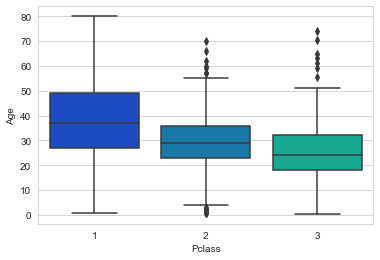

<Figure size 864x504 with 0 Axes>

In [10]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data = train, palette ='winter')
plt.figure(figsize=(12,7))

In [11]:
def impute_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
            
    else:
        return Age

In [12]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

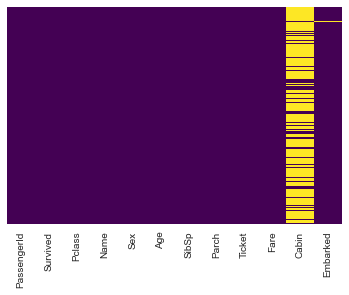

In [13]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False,cmap='viridis')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

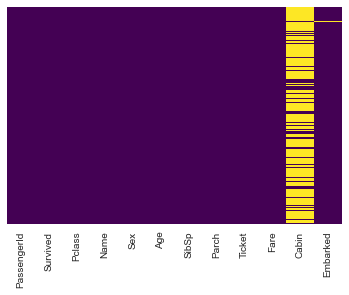

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [17]:
sex= pd.get_dummies(train['Sex'],drop_first=True)

In [18]:
embark= pd.get_dummies(train['Embarked'],drop_first=True)

In [19]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [21]:
train= pd.concat([train,sex,embark],axis=1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1


In [23]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,38.0,1,0,71.2833,C85,0,0,0
2,3,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,35.0,1,0,53.1000,C123,0,0,1
4,5,3,35.0,0,0,8.0500,NaN,1,0,1


In [24]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30),random_state=101

SyntaxError: cannot assign to function call (<ipython-input-26-f51a27ed8dea>, line 1)